# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)
 
### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

## TODO: Please make use of Python, Pandas, Numpy, Matplotlib and relevant libraries to do the following:

### Data Retrieval (1 pt)
- Extracting the dataset from the source (e.g., CSV file)
- Exploring the dataset structure, features
- Understanding the context and significance of each feature

### Data preprocessing (2 pts)
- Cleaning the dataset to handle missing values, duplicates, and outliers
- Encoding categorical variables and transforming data types as necessary

### Feature Engineering & EDA (3 pts)
- Feature engineering to create new variables(eg Date_since_last_purchase) and do Exploratory Data Analysis (EDA)
- Identifying correlations and patterns in the data
- Make use of 1-d and 2-d explorations to know your data better.

### Effective Communication (2 pts)
- Please make use of markdown cells to communicate your thought process, why did you think of performing a step? what was the observation from the visualization? etc. 
- Make sure the plots are correctly labelled. 
- The code should be commented so that it is readable for the reviewer.

### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.

#### Write your code below and do not delete the above instructions

In [1]:
import pandas as pd

file_path = "/Users/vijeethvj8/Downloads/Elevateme/ML 1/ecommerce_data.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display first five rows
print("\nFirst Five Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

First Five Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   


In [3]:
# Drop rows where CustomerID is missing, as we cannot segment customers without an ID
df_cleaned = df.dropna(subset=['CustomerID'])

# Convert 'CustomerID' to integer type
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)

# Convert 'InvoiceDate' to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Remove rows with negative or zero quantity (assumed to be returns/errors)
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

# Drop duplicate rows, if any
df_cleaned = df_cleaned.drop_duplicates()

# Check the cleaned dataset
print("\nCleaned Dataset Info:")
print(df_cleaned.info())

# Display first five rows after cleaning
print("\nFirst Five Rows After Cleaning:")
print(df_cleaned.head())


/var/folders/rm/p0jvbc851qj1h7yrs_k190_40000gn/T/ipykernel_89988/1770706686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(int)
/var/folders/rm/p0jvbc851qj1h7yrs_k190_40000gn/T/ipykernel_89988/1770706686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB
None

First Five Rows After Cleaning:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CU

In [7]:
# Create a new column for Total Monetary Value (Revenue)
df_cleaned["TotalAmount"] = df_cleaned["Quantity"] * df_cleaned["UnitPrice"]

# Calculate Recency (Days since last purchase)
latest_date = df_cleaned["InvoiceDate"].max()
df_recency = df_cleaned.groupby("CustomerID")["InvoiceDate"].max().reset_index()
df_recency["Recency"] = (latest_date - df_recency["InvoiceDate"]).dt.days

# Calculate Frequency (Total number of purchases per customer)
df_frequency = df_cleaned.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
df_frequency.columns = ["CustomerID", "Frequency"]

# Calculate Monetary Value (Total Revenue per Customer)
df_monetary = df_cleaned.groupby("CustomerID")["TotalAmount"].sum().reset_index()
df_monetary.columns = ["CustomerID", "MonetaryValue"]

# Merge all three features into one dataframe
df_features = df_recency.merge(df_frequency, on="CustomerID").merge(df_monetary, on="CustomerID")

# Display first few rows of the newly engineered features
print("\nFirst Five Rows of the Customer Segmentation Features:")
print(df_features.head())

# Save the processed file (optional)
df_features.to_csv("customer_segmentation_features.csv", index=False)



First Five Rows of the Customer Segmentation Features:
   CustomerID         InvoiceDate  Recency  Frequency  MonetaryValue
0       12346 2011-01-18 10:01:00      325          1       77183.60
1       12347 2011-12-07 15:52:00        1          7        4310.00
2       12348 2011-09-25 13:13:00       74          4        1797.24
3       12349 2011-11-21 09:51:00       18          1        1757.55
4       12350 2011-02-02 16:01:00      309          1         334.40


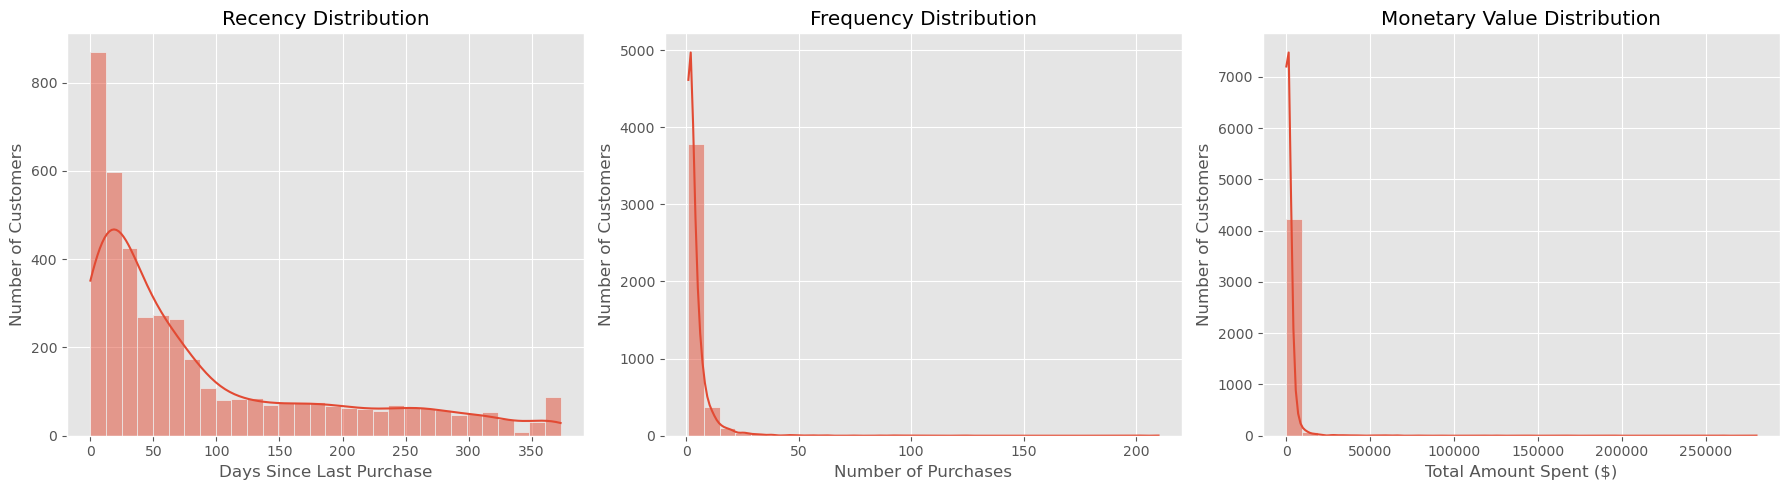

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')

# Create subplots for each feature
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency Distribution
sns.histplot(df_features["Recency"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Recency Distribution")
axes[0].set_xlabel("Days Since Last Purchase")
axes[0].set_ylabel("Number of Customers")

# Frequency Distribution
sns.histplot(df_features["Frequency"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Frequency Distribution")
axes[1].set_xlabel("Number of Purchases")
axes[1].set_ylabel("Number of Customers")

# Monetary Value Distribution
sns.histplot(df_features["MonetaryValue"], bins=30, kde=True, ax=axes[2])
axes[2].set_title("Monetary Value Distribution")
axes[2].set_xlabel("Total Amount Spent ($)")
axes[2].set_ylabel("Number of Customers")

# Show plots
plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Selecting features for clustering
features = ["Recency", "Frequency", "MonetaryValue"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
df_scaled = scaler.fit_transform(df_features[features])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Display first few rows
print("\nFirst Five Rows of Scaled Data:")
print(df_scaled.head())



First Five Rows of Scaled Data:
    Recency  Frequency  MonetaryValue
0  0.871314   0.000000       0.275453
1  0.002681   0.028708       0.015382
2  0.198391   0.014354       0.006414
3  0.048257   0.000000       0.006272
4  0.828418   0.000000       0.001193


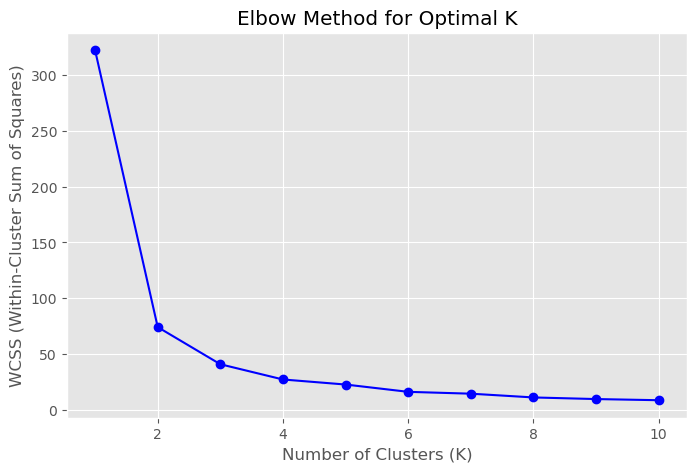

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding optimal K using Elbow Method
wcss = []
K_range = range(1, 11)  # Checking for K=1 to K=10

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()


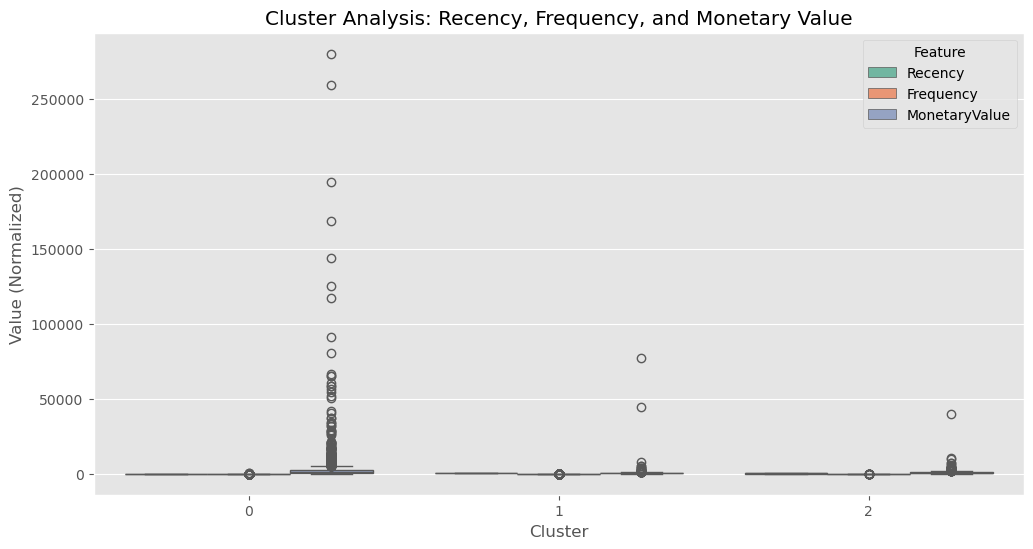

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('ggplot')

# Melt the dataframe for visualization
df_melted = df_features.melt(id_vars=["Cluster"], value_vars=["Recency", "Frequency", "MonetaryValue"])

# Create a boxplot to compare clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x="Cluster", y="value", hue="variable", data=df_melted, palette="Set2")
plt.title("Cluster Analysis: Recency, Frequency, and Monetary Value")
plt.xlabel("Cluster")
plt.ylabel("Value (Normalized)")
plt.legend(title="Feature")
plt.show()
